. تمرین: فیلتر گوسی و محاسبه نویز (فیلترهای فضایی)
مراحل تمرین
1.	بارگذاری تصویر: یک تصویر رنگی را بارگذاری کرده و آن را به تصویر خاکستری تبدیل کنید.
2.	ایجاد نویز: یک نویز گوسی (Gaussian Noise) به صورت دستی به تصویر خاکستری اضافه کنید.
o	نکته: می‌توانید با استفاده از تابع np.random.normal() یک آرایه نویز با میانگین صفر و انحراف معیار کم (مثلاً sigma=15) ایجاد کرده و آن را به تصویر اصلی اضافه کنید.
3.	اعمال فیلتر گوسی: تصویر نویزدار را با استفاده از تابع cv2.GaussianBlur با هسته 5*5 فیلتر کنید.
4.	محاسبه نویز باقیمانده (Residual Noise): با استفاده از عملیات NumPy، تفاوت بین تصویر نویزدار و تصویر فیلترشده را محاسبه کرده (تصویر نویزدار - تصویر فیلترشده) و میانگین قدر مطلق این تفاوت را به عنوان معیار نویز باقیمانده چاپ کنید.
5.	نمایش: تصویر اصلی، نویزدار و فیلترشده را کنار هم نمایش دهید.


میانگین نویز باقیمانده: 13.078538


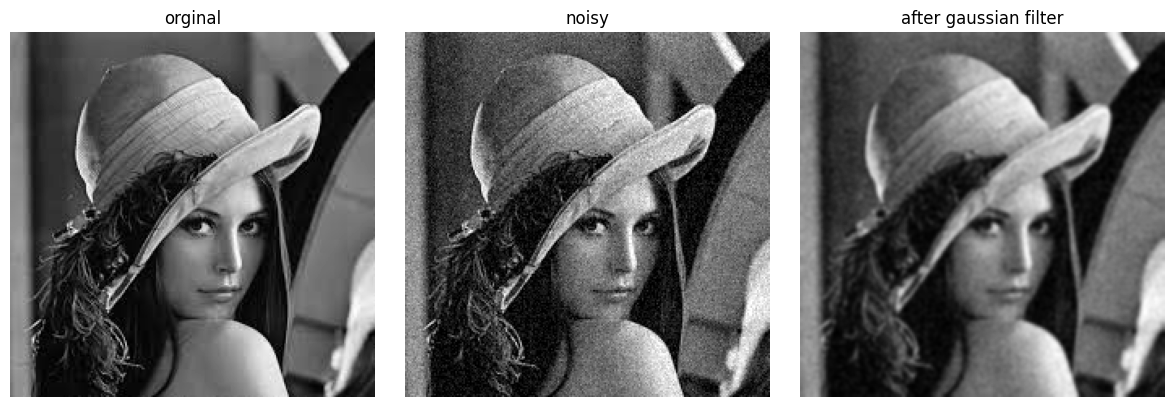

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#read picture
img_color = cv2.imread("C://Users//FARASYSTEM//Desktop//qwq.jfif")  
if img_color is None:
    raise SystemExit("تصویر image.jpg پیدا نشد.")

img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

#add noise
sigma = 15   # rating noise
noise = np.random.normal(0, sigma, img_gray.shape)   
noise = noise.astype(np.float32)

noisy_img = img_gray.astype(np.float32) + noise
noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)

#gaussian filter
filtered_img = cv2.GaussianBlur(noisy_img, (5, 5), 0)


#Residual Noise
residual = noisy_img.astype(np.float32) - filtered_img.astype(np.float32)
residual_mean = np.mean(np.abs(residual))

print("میانگین نویز باقیمانده:", residual_mean)

#show picture
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.title("orginal")
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title("noisy")
plt.imshow(noisy_img, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title("after gaussian filter")
plt.imshow(filtered_img, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


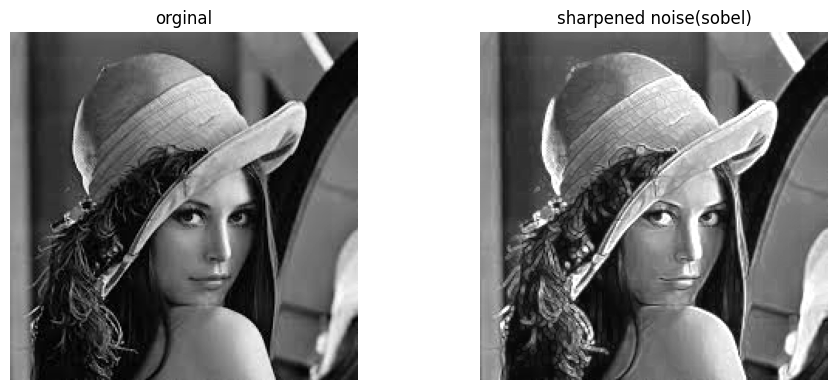

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#read picture
img = cv2.imread("C://Users//FARASYSTEM//Desktop//qwq.jfif", cv2.IMREAD_GRAYSCALE)

if img is None:
    raise SystemExit("تصویر پیدا نشد! اسم فایل را درست بزنید.")


sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)


grad = np.sqrt(sobel_x**2 + sobel_y**2)

#normalization
grad_norm = cv2.normalize(grad, None, 0, 255, cv2.NORM_MINMAX)
grad_norm = grad_norm.astype(np.uint8)


sharpened = cv2.add(img, grad_norm)  

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title("orginal")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("sharpened noise(sobel)")
plt.imshow(sharpened, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


. تمرین: تمیزکاری تصویر باینری (عملیات مورفولوژیکی)
مراحل تمرین
1.	بارگذاری تصویر: یک تصویر را بارگذاری کرده و آن را به تصویر خاکستری تبدیل کنید.
2.	آستانه‌گذاری (Thresholding): تصویر خاکستری را با استفاده از cv2.threshold به یک تصویر باینری (سیاه و سفید) تبدیل کنید. این تصویر به عنوان ورودی نویزدار شما عمل می‌کند.
3.	تعریف عنصر ساختاری: یک عنصر ساختاری 3*3 یا 5*5 مناسب (مانند cv2.MORPH_RECT) ایجاد کنید.
4.	اعمال تمیزکاری:
o	برای حذف نویزهای ریز سفید (نقاط نمکی)، عملیات بازشدگی (Opening) (cv2.MORPH_OPEN) را اعمال کنید.
o	برای پر کردن حفره‌های سیاه (نقاط فلفلی یا شکاف‌های کوچک)، عملیات بسته‌شدگی (Closing) (cv2.MORPH_CLOSE) را بر روی نتیجه‌ی بازشدگی اعمال کنید.
5.	نمایش: تصویر باینری نویزدار و تصویر نهایی تمیز شده را کنار هم نمایش دهید تا اثر مورفولوژی مشخص شود.



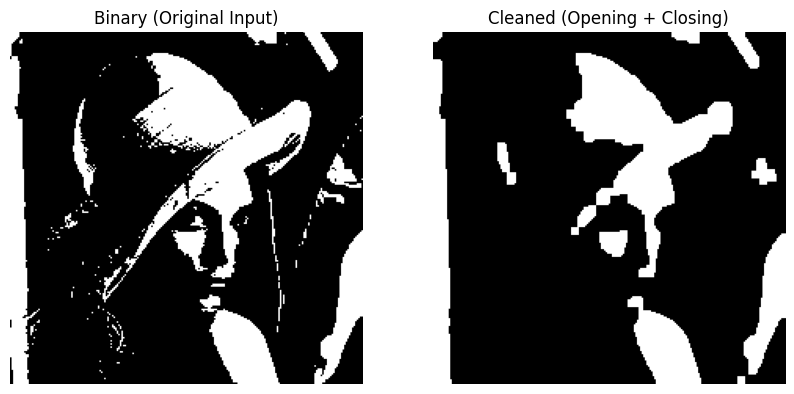

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['image.cmap'] = 'gray'


def show_images(images, titles):
    plt.figure(figsize=(5 * len(images), 5))
    for i, img in enumerate(images):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()


img = cv2.imread("C://Users//FARASYSTEM//Desktop//qwq.jfif")

if img is None:
    raise ValueError("تصویر پیدا نشد.")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)



_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)



kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))



opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
cleaned = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)



show_images(
    [binary, cleaned],
    ["Binary (Original Input)", "Cleaned (Opening + Closing)"]
)
